In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import scipy.linalg
import scipy.stats

Для начала смоделируем решение на отрезке от 0 до 10 с числом отрезков разбиения 1000. Для сравнения рассмотрим 3 случая: k распределено равномерно на [-1,0], на [-0.5,0.5] и на [0,1].

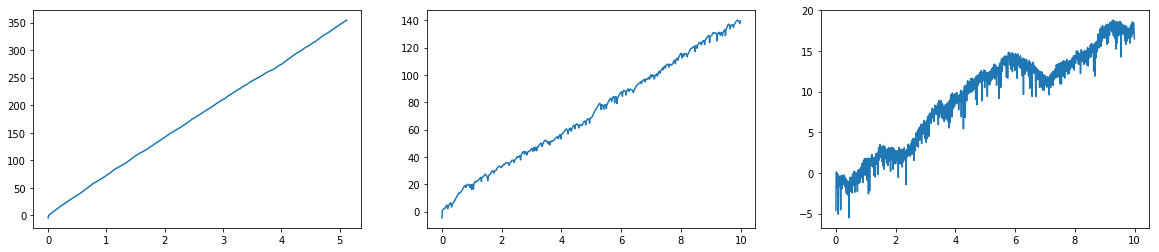

In [2]:
M = 10
N = 1000
D = M/N

fig, ax = plt.subplots(1, 3)
fig.set_figheight(4)
fig.set_figwidth(20)

for j in range(3):

    z = np.zeros((N,2))
    z[0][1] = D
    logzabs = np.zeros(N)
    logzabs[0] = math.log(np.linalg.norm(z[0]))

    for i in range(N)[1:]:
        k = random.uniform(-1,0)+0.5*j
        B = scipy.linalg.expm(np.array([[0,-k*D],[1/D,0]]))
        z[i] = z[i-1] @ B
        logzabs[i] = math.log(np.linalg.norm(z[i]))
        
    X = D*np.arange(N)
    Y = logzabs
    ax[j].plot(X,Y)

plt.show()

Посмотрим внимательнее на второй случай

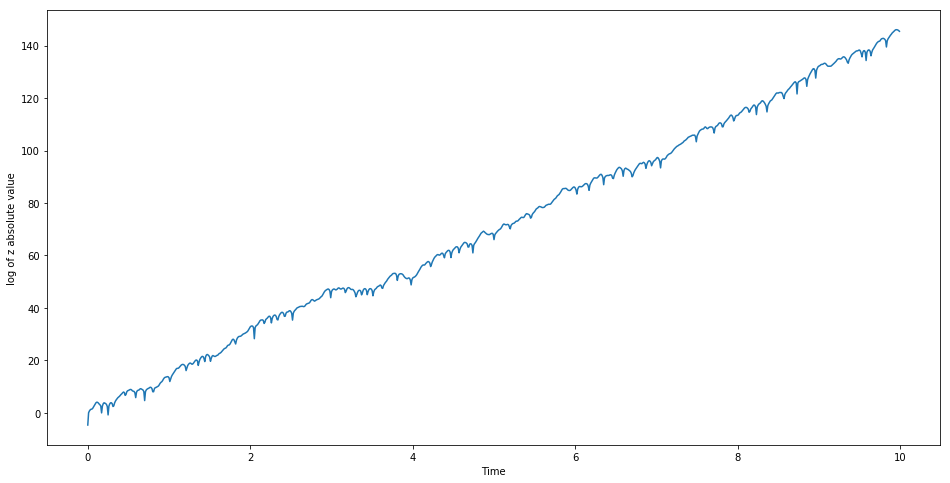

In [56]:
M = 10
N = 1000
D = M/N
z = np.zeros((N,2))
z[0][1] = D
logzabs = np.zeros(N)
logzabs[0] = math.log(np.linalg.norm(z[0]))

for i in range(N)[1:]:
    k = random.uniform(-0.5,0.5)
    B = scipy.linalg.expm(np.array([[0,-k*D],[1/D,0]]))
    z[i] = z[i-1] @ B
    logzabs[i] = math.log(np.linalg.norm(z[i]))
    
#X = np.linspace(0,M,N)
X = D*np.arange(N)
Y = logzabs
plt.figure(figsize=(16,8))
plt.plot(X,Y)
plt.xlabel('Time')
plt.ylabel('log of z absolute value')
plt.show()

Взглянем на график поближе. Убеждаемся, что логарифм модуля z и логарифм модуля y почти совпадают

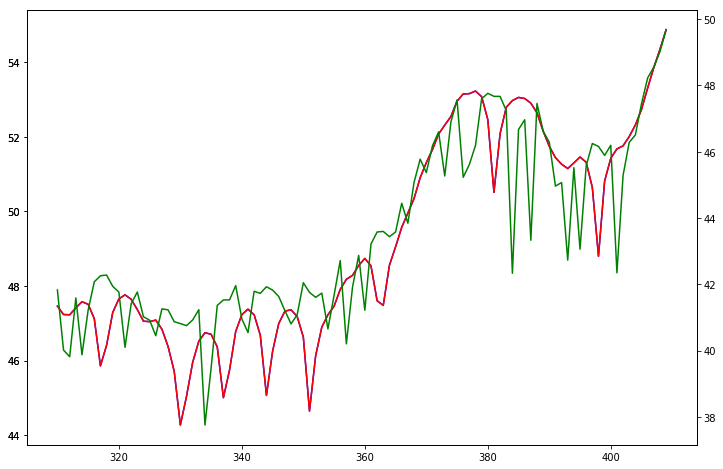

In [57]:
X = np.arange(310,410)
Y = np.log(abs(z[310:410,0]))
Z = np.log(abs(z[310:410,1]))
V = logzabs[310:410]
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
ax.plot(X,Y,color = 'blue')
ax2 = ax.twinx()
ax2.plot(X,V,color = 'red')
ax3 = ax2.twinx()
ax3.plot(X,Z,color = 'green')
plt.show()

Повторим это 20000 раз и запишем разности между соседними минимумами

In [28]:
M = 10
N = 1000
D = M/N
iter_num = 3000
logzabs = np.zeros(N)
ZZlenarr = np.zeros(iter_num) #список, содержащий число локальных минимумов в каждой итерации
ZZ_data = np.zeros(iter_num).reshape(iter_num,1) #список, содержащий все минимумы
max_len = 1

for j in range(iter_num):
    if (j+1)%500 == 0:
        print(j+1)
    z = np.zeros((N,2))
    z[0][1] = D
    logzabs[0] = math.log(np.linalg.norm(z[0]))
    for i in range(N)[1:]:
        k = random.uniform(-0.5,0.5)
        B = scipy.linalg.expm(np.array([[0,-k*D],[1/D,0]]))
        z[i] = z[i-1] @ B
        logzabs[i] = math.log(np.linalg.norm(z[i]))
    ZZ = np.array([D*i for i in range(1,N-1) if logzabs[i]<logzabs[i-1] and logzabs[i]<logzabs[i+1]])
    for i in range(len(ZZ))[len(ZZ)-1:0:-1]:
        ZZ[i] = ZZ[i] - ZZ[i-1]
    ZZlenarr[j] = len(ZZ)
    if len(ZZ)>max_len:
        ZZ_data = np.pad(ZZ_data,((0,0),(0,len(ZZ)-max_len)),'constant')
        max_len = len(ZZ)
    for i in range(max_len):
        if i < len(ZZ):
            ZZ_data[j,i] = ZZ[i]
        else:
            ZZ_data[j,i] = 0
    #plt.plot(np.arange(len(ZZ)),ZZ)
    #plt.show()
    #plt.hist(ZZ,bins=20)
    #plt.show()

#plt.hist(ZZlenarr,bins=np.arange(np.amin(ZZlenarr),np.amax(ZZlenarr)+1,1))
#plt.show()
print(ZZ_data)
print(ZZ_data.shape[1])

500
1000
1500
2000
2500
3000
[[0.08 0.05 0.17 ... 0.   0.   0.  ]
 [0.15 0.06 0.06 ... 0.   0.   0.  ]
 [0.16 0.22 0.04 ... 0.   0.   0.  ]
 ...
 [0.19 0.05 0.22 ... 0.   0.   0.  ]
 [0.05 0.09 0.15 ... 0.   0.   0.  ]
 [0.05 0.04 0.08 ... 0.   0.   0.  ]]
113


In [48]:
M = 10
N = 1000
D = M/N
iter_start = ZZ_data.shape[0]
iter_num = 8000
ZZlenarr = np.pad(ZZlenarr,(0,iter_num),'constant')
ZZ_data = np.pad(ZZ_data,((0,iter_num),(0,0)),'constant')

for j in range(iter_start,iter_start+iter_num):
    if (j+1)%500 == 0:
        print(j+1)
    z = np.zeros((N,2))
    z[0][1] = D
    logzabs[0] = math.log(np.linalg.norm(z[0]))
    for i in range(N)[1:]:
        k = random.uniform(-0.5,0.5)
        B = scipy.linalg.expm(np.array([[0,-k*D],[1/D,0]]))
        z[i] = z[i-1] @ B
        logzabs[i] = math.log(np.linalg.norm(z[i]))
    ZZ = np.array([D*i for i in range(1,N-1) if logzabs[i]<logzabs[i-1] and logzabs[i]<logzabs[i+1]])
    for i in range(len(ZZ))[len(ZZ)-1:0:-1]:
        ZZ[i] = ZZ[i] - ZZ[i-1]
    ZZlenarr[j] = len(ZZ)
    if len(ZZ)>max_len:
        ZZ_data = np.pad(ZZ_data,((0,0),(0,len(ZZ)-max_len)),'constant')
        max_len = len(ZZ)
    for i in range(max_len):
        if i < len(ZZ):
            ZZ_data[j,i] = ZZ[i]
        else:
            ZZ_data[j,i] = 0
    #plt.plot(np.arange(len(ZZ)),ZZ)
    #plt.show()
    #plt.hist(ZZ,bins=20)
    #plt.show()

#plt.hist(ZZlenarr,bins=np.arange(np.amin(ZZlenarr),np.amax(ZZlenarr)+1,1))
#plt.show()
print(ZZ_data)
print(ZZ_data.shape[1])

12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
[[0.08 0.05 0.17 ... 0.   0.   0.  ]
 [0.15 0.06 0.06 ... 0.   0.   0.  ]
 [0.16 0.22 0.04 ... 0.   0.   0.  ]
 ...
 [0.04 0.1  0.09 ... 0.   0.   0.  ]
 [0.1  0.07 0.06 ... 0.   0.   0.  ]
 [0.24 0.11 0.06 ... 0.   0.   0.  ]]
115


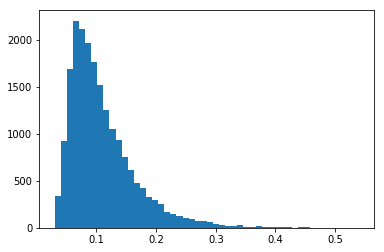

0.11287800000000002 0.003041207116


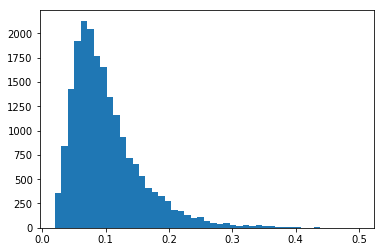

0.10509350000000002 0.0030060212577500004


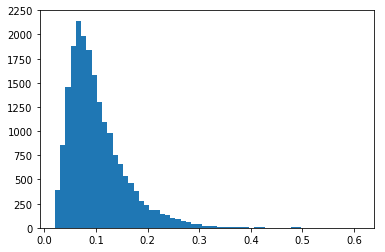

0.10527400000000002 0.0030869749240000004


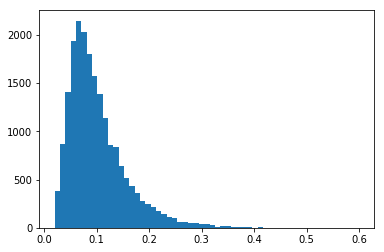

0.10489250000000001 0.0030260384437500003


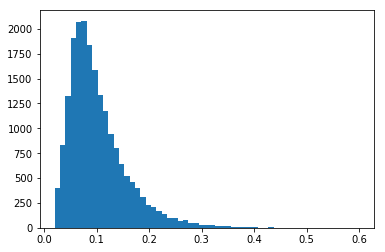

0.10580000000000002 0.0030742900000000004


In [49]:
P = 5
for j in range(P):
    W = np.array(ZZ_data[:,j])
    W = np.delete(W,np.where(W==0))
    plt.hist(W,bins = np.linspace(np.amin(W),np.amax(W),int((np.amax(W)-np.amin(W))/0.01)))
    plt.show()
    print(np.mean(W),np.var(W))

Увеличим длину отрезка от 10 до 1000, оставив число отрезков обновления равным 1000.

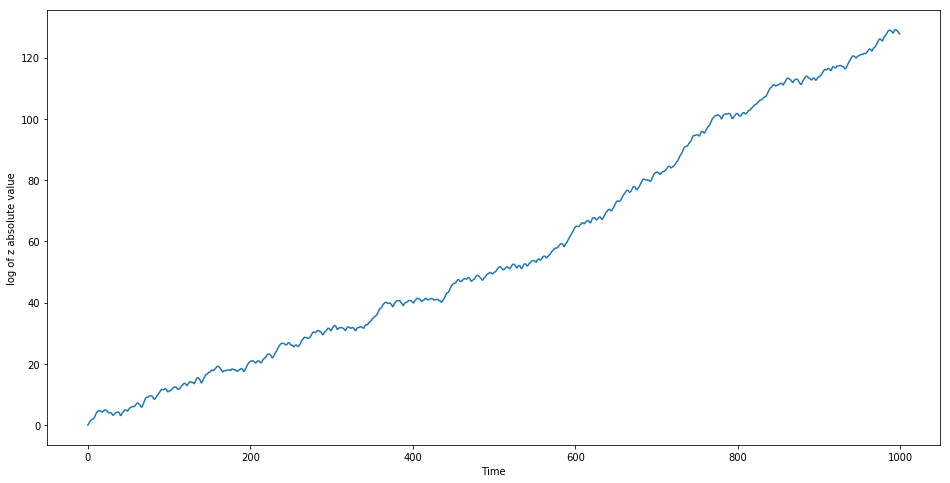

In [58]:
M = 1000
N = 1000
D = M/N
z = np.zeros((N,2))
z[0][1] = D
logzabs = np.zeros(N)
logzabs[0] = math.log(np.linalg.norm(z[0]))

for i in range(N)[1:]:
    k = random.uniform(-0.5,0.5)
    B = scipy.linalg.expm(np.array([[0,-k*D],[1/D,0]]))
    z[i] = z[i-1] @ B
    logzabs[i] = math.log(np.linalg.norm(z[i]))
    
#X = np.linspace(0,M,N)
X = D*np.arange(N)
Y = logzabs
plt.figure(figsize=(16,8))
plt.plot(X,Y)
plt.xlabel('Time')
plt.ylabel('log of z absolute value')
plt.show()

Видим, что траектория стала более плавной, нет таких резких скачков